In [1]:
# import modules
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt
import csv

# 1. If generate the combined df from individual file

In [10]:
# read txt information

data_main_folder = r'D:\CTP-13_brain-super-enhancers\from_Nathan'
data_sub_folder = [fd for fd in glob.glob(data_main_folder + os.sep + '*') if 'rose' in fd]
data_save_folder = r'D:\CTP-13_brain-super-enhancers\Super_enhancers_excels'

# loop through all folders
for index, cell_main_folder in enumerate(data_sub_folder):
    
    # get cell type name and the corresponding SE table
    cell_name = cell_main_folder.split('\\')[-1].split('_rose')[0]
    print (f'-- Process SE table for {cell_name}')
    file_name = f'{cell_name}_peaks_SuperEnhancers.table.txt'
    
    # initiate df to concat all results
    df = pd.DataFrame()
    # get row for each df
    with open(cell_main_folder+os.sep+file_name) as fd:
        rd = csv.reader(fd, delimiter="\t", quotechar='"')
        for _row_ind, row in enumerate(rd):
            #print(row)
            # get column names
            if _row_ind == 5:
                col_names = row  
            # get values in each row
            elif _row_ind >5:
                row_df = pd.DataFrame([row], columns=col_names) 
                # convert string to numeric for relevant cols
                for _col_name in row_df.columns[2:]:
                    row_df[_col_name] = pd.to_numeric(row_df[_col_name])
                # add the SIZE col
                row_df ['SIZE'] = row_df['STOP'] - row_df['START']  
                # add the SIZE ratio col
                row_df['SIZE_RATIO'] = row_df['CONSTITUENT_SIZE']/row_df['SIZE']
                # add the Cell type col
                row_df['CELL_TYPE'] = cell_name
                # concat the row
                df = pd.concat([df,row_df])
    
    df.to_excel(data_save_folder + os.sep + f'{cell_name}_SE.xlsx', index=False)
                    

-- Process SE table for Astro
-- Process SE table for L2_3_IT
-- Process SE table for L4_5_IT
-- Process SE table for L5_6_NP
-- Process SE table for L5_IT
-- Process SE table for L5_PT
-- Process SE table for L6b
-- Process SE table for L6_CT
-- Process SE table for L6_IT
-- Process SE table for Lamp5
-- Process SE table for MicroPVM
-- Process SE table for Oligo
-- Process SE table for Pvalb
-- Process SE table for Sncg
-- Process SE table for Sst
-- Process SE table for Vip


In [47]:
all_excel_file = [_f for _f in glob.glob(data_save_folder+ os.sep + '*') if 'combined' not in _f]

combined_df = pd.DataFrame()
for _excel in all_excel_file:
    df = pd.read_excel(_excel, index_col = None)
    cell_name =  _excel.split('\\')[-1].split('_SE')[0]
    
    bam_col_name = f"{cell_name}_sort.bam"
    new_bam_col_name = "sort.bam"
    df.rename(columns={bam_col_name: new_bam_col_name}, inplace=True)
    
    combined_df = pd.concat([combined_df, df])

# 2. If load combined df that is already generated

In [9]:
data_save_folder = r'D:\CTP-13_brain-super-enhancers\Super_enhancers_excels'
filename = r'combined_cell_type_SE.xlsx'

combined_df = pd.read_excel(data_save_folder + os.sep + filename, index_col = None)

In [5]:
combined_df.head()

,REGION_ID,CHROM,START,STOP,NUM_LOCI,CONSTITUENT_SIZE,sort.bam,enhancerRank,isSuper,SIZE,SIZE_RATIO,CELL_TYPE
0,14_peak_59262_lociStitched,chr6,47739370,47799485,14,12511,239167.5275,1,1,60115,0.208118,Astro
1,15_peak_71464_lociStitched,chr9,3000282,3036292,15,8927,207176.3330,2,1,36010,0.247903,Astro
2,47_peak_53506_lociStitched,chr4,154358977,154627263,47,36630,192226.9190,3,1,268286,0.136533,Astro
3,8_peak_59245_lociStitched,chr6,47659182,47686446,8,7448,168521.5104,4,1,27264,0.273181,Astro
4,1_peak_41385_lociStitched,chr2,98666552,98667320,1,769,168460.8000,5,1,768,1.001302,Astro


# 3. Access SE for each cell type for chromosome of interest

In [6]:
# excit

L2_3_IT_SE = combined_df[combined_df['CELL_TYPE']=='L2_3_IT']
L4_5_IT_SE = combined_df[combined_df['CELL_TYPE']=='L4_5_IT']
L6_CT_SE = combined_df[combined_df['CELL_TYPE']=='L6_CT']

# inhi
Sst_SE = combined_df[combined_df['CELL_TYPE']=='Sst']
Vip_SE = combined_df[combined_df['CELL_TYPE']=='Vip']
Pvalb_SE = combined_df[combined_df['CELL_TYPE']=='Pvalb']


# nonneuron
Astro_SE = combined_df[combined_df['CELL_TYPE']=='Astro']
MicroPVM_SE = combined_df[combined_df['CELL_TYPE']=='MicroPVM']
Oligo_SE = combined_df[combined_df['CELL_TYPE']=='Oligo']


len(Sst_SE)

1378

In [11]:

cell_type_df = [L2_3_IT_SE,L4_5_IT_SE, L6_CT_SE, Sst_SE, Pvalb_SE, Vip_SE,  Astro_SE, MicroPVM_SE, Oligo_SE]


filtered_cell_type_df = []

chrom_index = 'chr3'

for _type_df in cell_type_df:
    
    _type_df_SE_chrom = _type_df[_type_df['CHROM'] == chrom_index]
    _type_df_SE_chrom = _type_df_SE_chrom[_type_df_SE_chrom['SIZE']>0]
    _type_df_SE_chrom_sort = _type_df_SE_chrom.sort_values(by=['START']) 
    
    filtered_cell_type_df.append(_type_df_SE_chrom_sort)

    
print(len(_type_df_SE_chrom_sort))

print(len(filtered_cell_type_df))

56
9


In [8]:
coords_list = []

for filtered_type_df in filtered_cell_type_df:
    coords= []
    for row_df in filtered_type_df.iloc():
    
        coords.append(np.array([int(row_df['START']/1000),int(row_df['STOP']/1000)]))
    
    coords = np.array(coords)
    coords_list.append(coords)


<IPython.core.display.Javascript object>


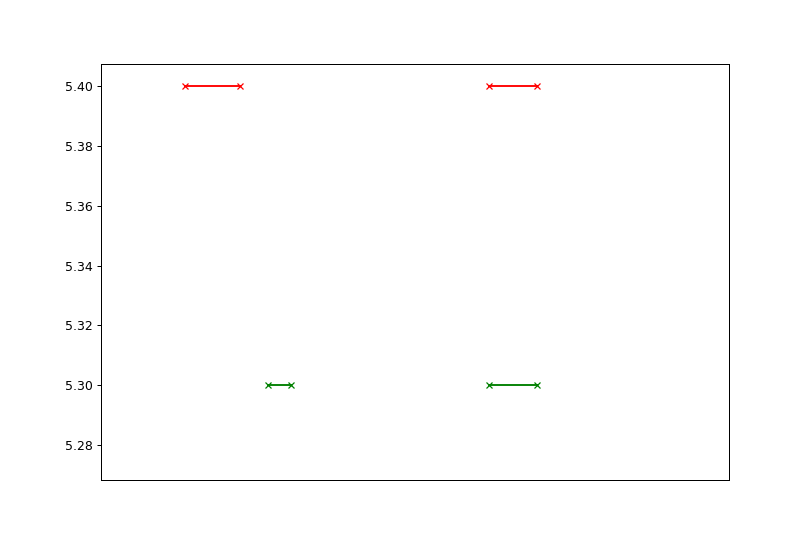

In [63]:
%matplotlib notebook

marker_shape_list = ['xr-', 'xg-', 'xb-', '*r-', '*g-', '*b-', 'or-','og-','ob-'] # l2-3,l4-5,sst,astro

count =5.5

fig, ax = plt.subplots(figsize=(9, 6))
for coords, marker_shape in zip(coords_list[:], marker_shape_list[:]):
    count-=0.1
    for index, coord in enumerate(coords):

        ax.plot(coord, np.zeros_like(coord) + count, marker_shape,markersize=5, alpha =1)

#plt.ylim (-10,10)
#plt.xlim([0, 20000000])
ax.set_ylim([0, 10])
ax.set_ylim([4, 6])

plt.show()

# 4. Aggregate SE for chromosome of interest (chr#3 for test)

In [51]:
#combined_df_chr.tail()
combined_df_chr.head()

,REGION_ID,CHROM,START,STOP,NUM_LOCI,CONSTITUENT_SIZE,sort.bam,enhancerRank,isSuper,SIZE,SIZE_RATIO,CELL_TYPE,initial_index
4388,6_peak_66182_lociStitched,chr3,8498072,8529726,6,5107,11389.1092,1740,1,31654,0.161338,L4_5_IT,4388
18419,6_peak_61264_lociStitched,chr3,8510035,8550229,6,4688,15056.6724,812,1,40194,0.116634,Sncg,18419
12173,9_peak_63676_lociStitched,chr3,8938038,8999355,9,5772,17530.5303,708,1,61317,0.094134,L6_IT,12173
15582,12_peak_46358_lociStitched,chr3,8938096,9007305,12,8059,34362.2685,435,1,69209,0.116444,Oligo,15582
14954,9_peak_39243_lociStitched,chr3,8956913,8993935,9,6591,25674.7570,896,1,37022,0.178029,MicroPVM,14954


In [ ]:
## A bug below when "_peak_df_to_merge['START'] > start_coord ", 
## which didn't consider the case where "_peak_df_to_merge['START'] == start_coord "
## this causes some smaller peak which starts the same as the large (merged) peak but ends early
## corrected this by removing the overlapping peaks in the codebook

In [135]:
# Merge all adjacent peaks

merge_dist = 100000 # bp

#cell_types = np.unique(combined_df['CELL_TYPE'])
chrom_index = 'chr12'
combined_df_chr = combined_df[combined_df['CHROM']==chrom_index]

combined_df_chr =combined_df_chr.sort_values(by=['START']) 
combined_df_chr['initial_index'] = combined_df_chr.index

merged_df_chr = pd.DataFrame()
merged_df = pd.DataFrame()

included_index_list =[]

verbose =True

for _peak_df_index, _peak_df_to_start in enumerate(combined_df_chr.iloc()):
    
    if _peak_df_to_start['initial_index'] not in included_index_list:
        
        if verbose:
            print (f'--Process peak #{_peak_df_index}.')

        merged_df = pd.DataFrame(columns=['CHROM','merged_START','merged_STOP', 'merged_CELL_TYPE', 'merged_initial_index'])
        
        included_index_list.append(_peak_df_to_start['initial_index'])  # flag the merged peak so it will not be processed repeatedly
        
 
        start_coord  = _peak_df_to_start ['START']
        end_coord  = _peak_df_to_start ['STOP']
        
        merged_peak_cell_types = []  
        merged_peak_cell_types.append(_peak_df_to_start ['CELL_TYPE'])  # flag the cell type
        
        merged_peak_index = []
        merged_peak_index.append(_peak_df_to_start ['initial_index'])  # flag the initial index for region assesment later
        
        
        for _peak_df_to_merge in combined_df_chr.iloc():
            
            if _peak_df_to_merge['initial_index'] not in included_index_list:
            
                if (_peak_df_to_merge['START'] > start_coord    # if target peak starts later (which should always be True since looping)
                    and _peak_df_to_merge['START'] < end_coord + merge_dist): # if target peak ends wthin the merge dist of the prior peak end
                
                    end_coord = max(_peak_df_to_merge['STOP'], end_coord)  # use the max of the peak ends as the new end
                    
                    included_index_list.append(_peak_df_to_merge['initial_index'])  # flag the merged peak so it will not be processed repeatedly
                    merged_peak_index.append(_peak_df_to_merge['initial_index'])    # flag the initial index for region assesment later
                    merged_peak_cell_types.append(_peak_df_to_merge['CELL_TYPE'])   # flag the cell type
        
        # after merging
        merged_df ['CHROM']= [chrom_index]
        merged_df ['merged_START'] = [start_coord]
        merged_df ['merged_STOP'] = [end_coord]
        merged_df ['merged_CELL_TYPE'] = [merged_peak_cell_types]
        merged_df ['merged_initial_index'] = [merged_peak_index]
        
        merged_df_chr = pd.concat([merged_df_chr,merged_df])
        


--Process peak #0.
--Process peak #1.
--Process peak #8.
--Process peak #48.
--Process peak #52.
--Process peak #54.
--Process peak #55.
--Process peak #95.
--Process peak #115.
--Process peak #116.
--Process peak #117.
--Process peak #119.
--Process peak #120.
--Process peak #142.
--Process peak #143.
--Process peak #144.
--Process peak #146.
--Process peak #160.
--Process peak #182.
--Process peak #191.
--Process peak #192.
--Process peak #212.
--Process peak #214.
--Process peak #231.
--Process peak #255.
--Process peak #265.
--Process peak #266.
--Process peak #309.
--Process peak #310.
--Process peak #313.
--Process peak #325.
--Process peak #330.
--Process peak #331.
--Process peak #332.
--Process peak #335.
--Process peak #343.
--Process peak #352.
--Process peak #354.
--Process peak #355.
--Process peak #357.
--Process peak #362.
--Process peak #363.
--Process peak #375.
--Process peak #391.
--Process peak #407.
--Process peak #414.
--Process peak #417.
--Process peak #418.
--P

In [136]:
# check if merging works by examining the index
index_after_merge = []

for index_list in merged_df_chr['merged_initial_index']:
    for index in index_list:
        index_after_merge.append(index)
    

len(index_after_merge)
len(combined_df_chr.index)
sorted(combined_df_chr.index)==sorted(index_after_merge)


True

In [137]:
merged_df_chr

,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index
0,chr12,3109872,3110094,[L6b],[9794]
0,chr12,3248104,3418061,"[Oligo, Oligo, Pvalb, Astro, Sncg, L4_5_IT, Vip]","[15556, 15385, 16795, 510, 17923, 3796, 21097]"
0,chr12,3535725,4029248,"[L6b, L4_5_IT, L5_6_NP, Vip, L6b, L6_CT, Vip, ...","[9522, 3471, 5462, 21306, 9451, 10047, 20515, ..."
0,chr12,4143332,4221331,"[L5_6_NP, L6_IT, L4_5_IT, L6_CT]","[4956, 12274, 3864, 11045]"
0,chr12,4357009,4525519,"[Sncg, Sst]","[18211, 20090]"
...,...,...,...,...,...
0,chr12,113424304,113430589,[MicroPVM],[14698]
0,chr12,116468022,117413369,"[L6_CT, L6_IT, L6_CT, L6b, L4_5_IT, L5_PT, L5_...","[11299, 11556, 10100, 8869, 2814, 8559, 7386, ..."
0,chr12,117527704,117773102,"[L2_3_IT, L6_IT, Pvalb, MicroPVM, L5_PT, L2_3_...","[1537, 11853, 16818, 14749, 8753, 1470, 4349, ..."
0,chr12,118836228,118856588,[Sncg],[18156]


In [175]:
# Evaluate all merged peaks

scored_merged_df_chr = pd.DataFrame()
for merge_peak_df in merged_df_chr.iloc():
    
    scored_merged_df = pd.DataFrame()
    merged_size = merge_peak_df['merged_STOP'] - merge_peak_df['merged_START']
    merged_index = merge_peak_df['merged_initial_index']
    
    score_list = []
    
    for _num, _index in enumerate(merged_index):
        
        _peak_before_merge = combined_df_chr[combined_df_chr['initial_index']==_index]
        
        score = round((_peak_before_merge['STOP']-_peak_before_merge['START'])/merged_size,5)
        
        score_list.append(score.values)
    
    #print(score_list)
    score_list = [_s[0] for _s in score_list]
    score_list = np.array(score_list)
    ave_score = np.mean(score_list)
    
    
    scored_merged_df['CHROM'] = [merge_peak_df['CHROM']]
    scored_merged_df['merged_START'] = [merge_peak_df['merged_START']]
    scored_merged_df['merged_STOP'] = [merge_peak_df['merged_STOP']]
    scored_merged_df['merged_CELL_TYPE'] = [merge_peak_df['merged_CELL_TYPE']]
    scored_merged_df['merged_initial_index'] = [merge_peak_df['merged_initial_index']]
    
    scored_merged_df['score'] = [score_list]
    scored_merged_df['ave_score'] = [ave_score]
    
    scored_merged_df_chr = pd.concat([scored_merged_df_chr,scored_merged_df])

    
scored_merged_df_chr['merged_SIZE']   = scored_merged_df_chr['merged_STOP'] - scored_merged_df_chr['merged_START']
scored_merged_df_chr    

,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index,score,ave_score,merged_SIZE
0,chr12,3109872,3110094,[L6b],[9794],[1.0],1.000000,222
0,chr12,3248104,3418061,"[Oligo, Oligo, Pvalb, Astro, Sncg, L4_5_IT, Vip]","[15556, 15385, 16795, 510, 17923, 3796, 21097]","[0.44577, 0.35798, 0.35885, 0.2814, 0.28196, 0...",0.302871,169957
0,chr12,3535725,4029248,"[L6b, L4_5_IT, L5_6_NP, Vip, L6b, L6_CT, Vip, ...","[9522, 3471, 5462, 21306, 9451, 10047, 20515, ...","[0.06743, 0.09094, 0.08674, 0.07997, 0.1168, 0...",0.088378,493523
0,chr12,4143332,4221331,"[L5_6_NP, L6_IT, L4_5_IT, L6_CT]","[4956, 12274, 3864, 11045]","[0.84465, 0.89909, 0.77814, 0.65228]",0.793540,77999
0,chr12,4357009,4525519,"[Sncg, Sst]","[18211, 20090]","[0.51139, 0.26011]",0.385750,168510
...,...,...,...,...,...,...,...,...
0,chr12,113424304,113430589,[MicroPVM],[14698],[1.0],1.000000,6285
0,chr12,116468022,117413369,"[L6_CT, L6_IT, L6_CT, L6b, L4_5_IT, L5_PT, L5_...","[11299, 11556, 10100, 8869, 2814, 8559, 7386, ...","[0.05095, 0.13224, 0.07781, 0.13494, 0.08812, ...",0.066255,945347
0,chr12,117527704,117773102,"[L2_3_IT, L6_IT, Pvalb, MicroPVM, L5_PT, L2_3_...","[1537, 11853, 16818, 14749, 8753, 1470, 4349, ...","[0.32406, 0.32165, 0.26449, 0.11433, 0.1269, 0...",0.253387,245398
0,chr12,118836228,118856588,[Sncg],[18156],[1.0],1.000000,20360


In [174]:
len(scored_merged_df_chr  [scored_merged_df_chr  ['ave_score']>0.75])

test =scored_merged_df_chr  [scored_merged_df_chr  ['ave_score']>0.75]

test['merged_SIZE']

print(len(test))
print(test['merged_SIZE'].mean()/1000)

test

43
54.09041860465116


,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index,score,ave_score,merged_SIZE
0,chr12,3109872,3110094,[L6b],[9794],[[1.0]],1.000000,222
0,chr12,4143332,4221331,"[L5_6_NP, L6_IT, L4_5_IT, L6_CT]","[4956, 12274, 3864, 11045]","[[0.84465], [0.89909], [0.77814], [0.65228]]",0.793540,77999
0,chr12,4679994,4757519,[Oligo],[15477],[[1.0]],1.000000,77525
0,chr12,8659279,8699465,[MicroPVM],[14983],[[1.0]],1.000000,40186
0,chr12,8916293,8936352,[Oligo],[16363],[[1.0]],1.000000,20059
0,chr12,11322932,11404073,[Pvalb],[17053],[[1.0]],1.000000,81141
0,chr12,12765678,12828753,[Sncg],[18789],[[1.0]],1.000000,63075
0,chr12,13079761,13145339,[Lamp5],[13658],[[1.0]],1.000000,65578
0,chr12,21424404,21457592,[Oligo],[15804],[[1.0]],1.000000,33188
0,chr12,29537911,29572105,[L5_IT],[6724],[[1.0]],1.000000,34194


In [150]:


test_2 =scored_merged_df_chr  [scored_merged_df_chr  ['ave_score']<0.75]

test_2['merged_SIZE']

print(len(test_2))


print(test_2['ave_score'].mean())
print(test_2['merged_SIZE'].mean()/1000)

66
0.27359634693982166
336.5417727272727


# Process all SE for all chromosomes

49689.0


<IPython.core.display.Javascript object>


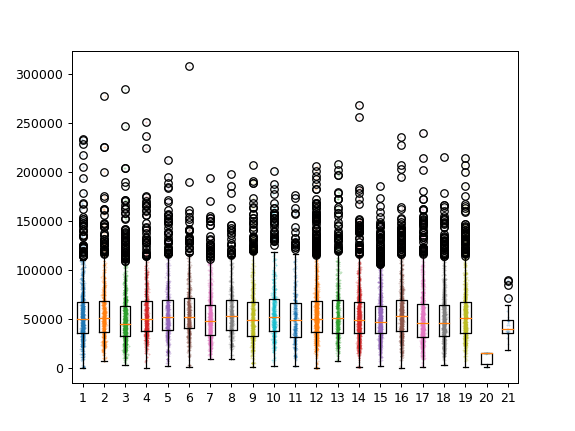

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [234]:
%matplotlib notebook

print(combined_df['SIZE'].median())


#g1= combined_df['SIZE']

SE_size_all_chrom = []

num_of_SE_dict = {}

for _chrom_index in np.unique(combined_df['CHROM']):
    
    chrom_df = combined_df[combined_df['CHROM']==_chrom_index]
    SE_size_all_chrom.append(chrom_df['SIZE'])
    
    num_of_SE_dict[_chrom_index] = len(chrom_df)


boxplot_1= plt.boxplot(SE_size_all_chrom, meanline = True)
vals, xs = [], [] 

for i, subdf in enumerate(SE_size_all_chrom):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 0.1, alpha=0.5)

In [241]:
num_of_SE_df  =pd.DataFrame(num_of_SE_dict, index=[0])
num_of_SE_df.iloc[:10,:]
num_of_SE_df.to_excel(data_save_folder+os.sep+'number_of_SE.xlsx', index=False)

In [177]:
np.unique(combined_df['CHROM'])

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9', 'chrM', 'chrX'], dtype=object)

In [244]:



scored_merged_df_all_chr = pd.DataFrame()


for chrom_index in np.unique(combined_df['CHROM']):



    # 1. Merge all adjacent peaks

    merge_dist = 50000 # bp

    #cell_types = np.unique(combined_df['CELL_TYPE'])
    #chrom_index = 'chr12'

    combined_df_chr = combined_df[combined_df['CHROM']==chrom_index]
    

    combined_df_chr =combined_df_chr.sort_values(by=['START']) 
    combined_df_chr['initial_index'] = combined_df_chr.index

    merged_df_chr = pd.DataFrame()
    merged_df = pd.DataFrame()

    included_index_list =[]

    verbose =False

    for _peak_df_index, _peak_df_to_start in enumerate(combined_df_chr.iloc()):
    
        if _peak_df_to_start['initial_index'] not in included_index_list:
        
            if verbose:
                print (f'--Process peak #{_peak_df_index}.')

            merged_df = pd.DataFrame(columns=['CHROM','merged_START','merged_STOP', 'merged_CELL_TYPE', 'merged_initial_index'])
        
            included_index_list.append(_peak_df_to_start['initial_index'])  # flag the merged peak so it will not be processed repeatedly
        
            start_coord  = _peak_df_to_start ['START']
            end_coord  = _peak_df_to_start ['STOP']
        
            merged_peak_cell_types = []  
            merged_peak_cell_types.append(_peak_df_to_start ['CELL_TYPE'])  # flag the cell type
        
            merged_peak_index = []
            merged_peak_index.append(_peak_df_to_start ['initial_index'])  # flag the initial index for region assesment later
        
        
            for _peak_df_to_merge in combined_df_chr.iloc():
            
                if _peak_df_to_merge['initial_index'] not in included_index_list:
            
                    if (_peak_df_to_merge['START'] > start_coord    # if target peak starts later (which should always be True since looping)
                        and _peak_df_to_merge['START'] < end_coord + merge_dist): # if target peak ends wthin the merge dist of the prior peak end
                
                        end_coord = max(_peak_df_to_merge['STOP'], end_coord)  # use the max of the peak ends as the new end
                    
                        included_index_list.append(_peak_df_to_merge['initial_index'])  # flag the merged peak so it will not be processed repeatedly
                        merged_peak_index.append(_peak_df_to_merge['initial_index'])    # flag the initial index for region assesment later
                        merged_peak_cell_types.append(_peak_df_to_merge['CELL_TYPE'])   # flag the cell type
        
            # after merging
            merged_df ['CHROM']= [chrom_index]
            merged_df ['merged_START'] = [start_coord]
            merged_df ['merged_STOP'] = [end_coord]
            merged_df ['merged_CELL_TYPE'] = [merged_peak_cell_types]
            merged_df ['merged_initial_index'] = [merged_peak_index]
        
            merged_df_chr = pd.concat([merged_df_chr,merged_df])
            
    print (f'-- Merge {len(combined_df_chr)} peaks to {len(merged_df_chr)} peaks from chromosome {chrom_index}.')
    print (f'-------------------------------------------------------------')
            
            
            
            

-- Merge 1349 peaks to 247 peaks from chromosome chr1.
-------------------------------------------------------------
-- Merge 914 peaks to 178 peaks from chromosome chr10.
-------------------------------------------------------------
-- Merge 1683 peaks to 240 peaks from chromosome chr11.
-------------------------------------------------------------
-- Merge 1011 peaks to 145 peaks from chromosome chr12.
-------------------------------------------------------------
-- Merge 916 peaks to 149 peaks from chromosome chr13.
-------------------------------------------------------------
-- Merge 781 peaks to 148 peaks from chromosome chr14.
-------------------------------------------------------------
-- Merge 1092 peaks to 145 peaks from chromosome chr15.
-------------------------------------------------------------
-- Merge 698 peaks to 125 peaks from chromosome chr16.
-------------------------------------------------------------
-- Merge 911 peaks to 135 peaks from chromosome chr17.
------

In [249]:
merged_df_chr

,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index
0,chrX,12043312,12148074,"[Astro, L5_IT, L5_PT, Oligo, MicroPVM]","[540, 6809, 8695, 16056, 14783]"
0,chrX,13461277,13636716,"[L4_5_IT, MicroPVM]","[3646, 14315]"
0,chrX,93281165,93299819,[Astro],[1035]
0,chrX,98989231,99078826,[MicroPVM],[14882]
0,chrX,101920335,102005609,[L6_CT],[10671]
0,chrX,136782307,136841006,[Oligo],[15547]
0,chrX,140491839,140537985,"[Astro, MicroPVM]","[863, 15089]"
0,chrX,166245960,166360949,"[Oligo, L2_3_IT, L6_IT, L4_5_IT, L5_IT]","[15644, 2247, 12733, 4068, 7140]"
0,chrX,167132110,167181320,[MicroPVM],[14962]
0,chrX,169972881,170022477,"[Oligo, MicroPVM, Sncg, Lamp5, Vip, L5_PT, L5_...","[15191, 14071, 17617, 12853, 20258, 7414, 5840..."


In [248]:
num_of_merged_SE_dict = {}
for _chrom_index in np.unique(merged_df_chr['CHROM']):
    
    chrom_df = merged_df_chr[merged_df_chr['CHROM']==_chrom_index]
    #SE_size_all_chrom.append(len(chrom_df))
    num_of_merged_SE_dict[_chrom_index] = len(chrom_df)
    
    
num_of_merged_SE_dict

{'chrX': 10}

In [251]:


scored_merged_df_all_chr = pd.DataFrame()

for chrom_index in np.unique(combined_df['CHROM']):

    # 1. Merge all adjacent peaks

    merge_dist = 100000 # bp

    #cell_types = np.unique(combined_df['CELL_TYPE'])
    #chrom_index = 'chr12'

    combined_df_chr = combined_df[combined_df['CHROM']==chrom_index]
    
    print (f'-- Merge {len(combined_df_chr)} peaks from chromosome {chrom_index}.')


    combined_df_chr =combined_df_chr.sort_values(by=['START']) 
    combined_df_chr['initial_index'] = combined_df_chr.index

    merged_df_chr = pd.DataFrame()
    merged_df = pd.DataFrame()

    included_index_list =[]

    verbose =False

    for _peak_df_index, _peak_df_to_start in enumerate(combined_df_chr.iloc()):
    
        if _peak_df_to_start['initial_index'] not in included_index_list:
        
            if verbose:
                print (f'--Process peak #{_peak_df_index}.')

            merged_df = pd.DataFrame(columns=['CHROM','merged_START','merged_STOP', 'merged_CELL_TYPE', 'merged_initial_index'])
        
            included_index_list.append(_peak_df_to_start['initial_index'])  # flag the merged peak so it will not be processed repeatedly
        
 
            start_coord  = _peak_df_to_start ['START']
            end_coord  = _peak_df_to_start ['STOP']
        
            merged_peak_cell_types = []  
            merged_peak_cell_types.append(_peak_df_to_start ['CELL_TYPE'])  # flag the cell type
        
            merged_peak_index = []
            merged_peak_index.append(_peak_df_to_start ['initial_index'])  # flag the initial index for region assesment later
        
        
            for _peak_df_to_merge in combined_df_chr.iloc():
            
                if _peak_df_to_merge['initial_index'] not in included_index_list:
            
                    if (_peak_df_to_merge['START'] > start_coord    # if target peak starts later (which should always be True since looping)
                        and _peak_df_to_merge['START'] < end_coord + merge_dist): # if target peak ends wthin the merge dist of the prior peak end
                
                        end_coord = max(_peak_df_to_merge['STOP'], end_coord)  # use the max of the peak ends as the new end
                    
                        included_index_list.append(_peak_df_to_merge['initial_index'])  # flag the merged peak so it will not be processed repeatedly
                        merged_peak_index.append(_peak_df_to_merge['initial_index'])    # flag the initial index for region assesment later
                        merged_peak_cell_types.append(_peak_df_to_merge['CELL_TYPE'])   # flag the cell type
        
            # after merging
            merged_df ['CHROM']= [chrom_index]
            merged_df ['merged_START'] = [start_coord]
            merged_df ['merged_STOP'] = [end_coord]
            merged_df ['merged_CELL_TYPE'] = [merged_peak_cell_types]
            merged_df ['merged_initial_index'] = [merged_peak_index]
        
            merged_df_chr = pd.concat([merged_df_chr,merged_df])
            
##################################################################################
            
    #2. Evaluate all merged peaks

    print (f'-- Evaluate {len(merged_df_chr)} merged peaks from chromosome {chrom_index}.')
    scored_merged_df_chr = pd.DataFrame()


    for merge_peak_df in merged_df_chr.iloc():
    
        scored_merged_df = pd.DataFrame()
    
        merged_size = merge_peak_df['merged_STOP'] - merge_peak_df['merged_START']
    
        merged_index = merge_peak_df['merged_initial_index']
    
        score_list = []
    
        for _num, _index in enumerate(merged_index):
        
            _peak_before_merge = combined_df_chr[combined_df_chr['initial_index']==_index]
        
            score = round((_peak_before_merge['STOP']-_peak_before_merge['START'])/merged_size,5)
        
            score_list.append(score.values)
    
        #print(score_list)
        score_list = [_s[0] for _s in score_list]
        score_list = np.array(score_list)
        ave_score = np.mean(score_list)
    
    
        scored_merged_df['CHROM'] = [merge_peak_df['CHROM']]
        scored_merged_df['merged_START'] = [merge_peak_df['merged_START']]
        scored_merged_df['merged_STOP'] = [merge_peak_df['merged_STOP']]
        scored_merged_df['merged_CELL_TYPE'] = [merge_peak_df['merged_CELL_TYPE']]
        scored_merged_df['merged_initial_index'] = [merge_peak_df['merged_initial_index']]
    
        scored_merged_df['score'] = [score_list]
        scored_merged_df['ave_score'] = [ave_score]
    
        scored_merged_df_chr = pd.concat([scored_merged_df_chr,scored_merged_df])

    
    scored_merged_df_chr['merged_SIZE']   = scored_merged_df_chr['merged_STOP'] - scored_merged_df_chr['merged_START']
    
    
    scored_merged_df_all_chr =  pd.concat([scored_merged_df_all_chr, scored_merged_df_chr])
     
            

-- Merge 1349 peaks from chromosome chr1.
-- Evaluate 199 merged peaks from chromosome chr1.
-- Merge 914 peaks from chromosome chr10.
-- Evaluate 137 merged peaks from chromosome chr10.
-- Merge 1683 peaks from chromosome chr11.
-- Evaluate 176 merged peaks from chromosome chr11.
-- Merge 1011 peaks from chromosome chr12.
-- Evaluate 109 merged peaks from chromosome chr12.
-- Merge 916 peaks from chromosome chr13.
-- Evaluate 129 merged peaks from chromosome chr13.
-- Merge 781 peaks from chromosome chr14.
-- Evaluate 123 merged peaks from chromosome chr14.
-- Merge 1092 peaks from chromosome chr15.
-- Evaluate 106 merged peaks from chromosome chr15.
-- Merge 698 peaks from chromosome chr16.
-- Evaluate 100 merged peaks from chromosome chr16.
-- Merge 911 peaks from chromosome chr17.
-- Evaluate 104 merged peaks from chromosome chr17.
-- Merge 733 peaks from chromosome chr18.
-- Evaluate 86 merged peaks from chromosome chr18.
-- Merge 496 peaks from chromosome chr19.
-- Evaluate 79 me

In [180]:
scored_merged_df_all_chr

,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index,score,ave_score,merged_SIZE
0,chr1,3264724,3442106,"[Sst, Pvalb, Sst]","[20052, 17158, 20065]","[0.37914, 0.3063, 0.24267]",0.309370,177382
0,chr1,5022706,5034201,[Astro],[985],[1.0],1.000000,11495
0,chr1,9610471,9646458,[L6_CT],[10392],[1.0],1.000000,35987
0,chr1,9759317,9835402,[L2_3_IT],[2107],[1.0],1.000000,76085
0,chr1,11427152,11621058,"[Lamp5, Lamp5, L6_CT]","[13957, 14022, 11385]","[0.35014, 0.36793, 0.20372]",0.307263,193906
...,...,...,...,...,...,...,...,...
0,chrX,136782307,136841006,[Oligo],[15547],[1.0],1.000000,58699
0,chrX,140491839,140537985,"[Astro, MicroPVM]","[863, 15089]","[0.8207, 0.99885]",0.909775,46146
0,chrX,166245960,166360949,"[Oligo, L2_3_IT, L6_IT, L4_5_IT, L5_IT]","[15644, 2247, 12733, 4068, 7140]","[0.77351, 0.45122, 0.38371, 0.38122, 0.32894]",0.463720,114989
0,chrX,167132110,167181320,[MicroPVM],[14962],[1.0],1.000000,49210


# Load from saved file

Example of [superenhancer_table](../resources/combined_cell_type_SE.csv) below in this repository

In [10]:
data_save_folder = r'D:\CTP-13_brain-super-enhancers\Super_enhancers_excels'
filename = r'combined_cell_type_SE.xlsx'

combined_df = pd.read_excel(data_save_folder + os.sep + filename, index_col = None)

In [14]:
combined_df.head()

,REGION_ID,CHROM,START,STOP,NUM_LOCI,CONSTITUENT_SIZE,sort.bam,enhancerRank,isSuper,SIZE,SIZE_RATIO,CELL_TYPE
0,14_peak_59262_lociStitched,chr6,47739370,47799485,14,12511,239167.5275,1,1,60115,0.208118,Astro
1,15_peak_71464_lociStitched,chr9,3000282,3036292,15,8927,207176.3330,2,1,36010,0.247903,Astro
2,47_peak_53506_lociStitched,chr4,154358977,154627263,47,36630,192226.9190,3,1,268286,0.136533,Astro
3,8_peak_59245_lociStitched,chr6,47659182,47686446,8,7448,168521.5104,4,1,27264,0.273181,Astro
4,1_peak_41385_lociStitched,chr2,98666552,98667320,1,769,168460.8000,5,1,768,1.001302,Astro


Example of [merged_superenhancer_locus_table](../resources/merged_selected_SE_all_cell_types.xlsx) in this repository

In [2]:


data_save_folder = r'D:\CTP-13_brain-super-enhancers'
save_filename = r'merged_SE_all_cell_types.xlsx'

scored_merged_df_all_chr = pd.read_excel(data_save_folder + os.sep + save_filename, index_col=None)

In [3]:
scored_merged_df_all_chr

,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index,score,ave_score,merged_SIZE
0,chr1,3264724,3442106,"['Sst', 'Pvalb', 'Sst']","[20052, 17158, 20065]",[0.37914 0.3063 0.24267],0.309370,177382
1,chr1,5022706,5034201,['Astro'],[985],[1.],1.000000,11495
2,chr1,9610471,9646458,['L6_CT'],[10392],[1.],1.000000,35987
3,chr1,9759317,9835402,['L2_3_IT'],[2107],[1.],1.000000,76085
4,chr1,11427152,11621058,"['Lamp5', 'Lamp5', 'L6_CT']","[13957, 14022, 11385]",[0.35014 0.36793 0.20372],0.307263,193906
...,...,...,...,...,...,...,...,...
2639,chrX,136782307,136841006,['Oligo'],[15547],[1.],1.000000,58699
2640,chrX,140491839,140537985,"['Astro', 'MicroPVM']","[863, 15089]",[0.8207 0.99885],0.909775,46146
2641,chrX,166245960,166360949,"['Oligo', 'L2_3_IT', 'L6_IT', 'L4_5_IT', 'L5_IT']","[15644, 2247, 12733, 4068, 7140]",[0.77351 0.45122 0.38371 0.38122 0.32894],0.463720,114989
2642,chrX,167132110,167181320,['MicroPVM'],[14962],[1.],1.000000,49210


In [253]:
len(scored_merged_df_all_chr)

2644

In [4]:
scored_merged_df_all_chr.groupby(by=['merged_CELL_TYPE'])



filtered_merged_df = scored_merged_df_all_chr[scored_merged_df_all_chr['ave_score'] >0.8]

print(len(filtered_merged_df))
filtered_merged_df = filtered_merged_df[filtered_merged_df ['merged_SIZE']>15000]

print(len(filtered_merged_df))


filtered_merged_df[:20]

1023
991


,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index,score,ave_score,merged_SIZE
2,chr1,9610471,9646458,['L6_CT'],[10392],[1.],1.000000,35987
3,chr1,9759317,9835402,['L2_3_IT'],[2107],[1.],1.000000,76085
6,chr1,20898605,20943251,['Astro'],[194],[1.],1.000000,44646
7,chr1,21485446,21554433,['L2_3_IT'],[2210],[1.],1.000000,68987
8,chr1,21684557,21783163,['Sncg'],[17985],[1.],1.000000,98606
11,chr1,23255924,23287215,['Astro'],[988],[1.],1.000000,31291
12,chr1,23928055,23989346,"['L5_6_NP', 'L6_IT', 'L4_5_IT']","[5606, 12507, 4466]",[0.95308 0.94221 0.99465],0.963313,61291
13,chr1,24218993,24265055,['L4_5_IT'],[4081],[1.],1.000000,46062
19,chr1,35495994,35586498,['Sst'],[20202],[1.],1.000000,90504
20,chr1,36052487,36100247,"['MicroPVM', 'Oligo']","[14538, 16044]",[1. 0.64577],0.822885,47760


In [5]:
%matplotlib notebook

num_of_SE_dict_after_score = {}
num_of_SE_dict_after_size = {}

for _chrom_index in np.unique(scored_merged_df_all_chr['CHROM']):
    
    chrom_df = scored_merged_df_all_chr[scored_merged_df_all_chr['CHROM']==_chrom_index]
    
    filtered_chrom_df = chrom_df[chrom_df['ave_score']>0.8]
    
    num_of_SE_dict_after_score[_chrom_index] = len(filtered_chrom_df )
    
    filtered_chrom_df = filtered_chrom_df[filtered_chrom_df ['merged_SIZE']>15000]
    num_of_SE_dict_after_size[_chrom_index] = len(filtered_chrom_df )



In [259]:
num_of_SE_dict_after_score

{'chr1': 78,
 'chr10': 66,
 'chr11': 59,
 'chr12': 39,
 'chr13': 51,
 'chr14': 60,
 'chr15': 36,
 'chr16': 40,
 'chr17': 34,
 'chr18': 36,
 'chr19': 36,
 'chr2': 77,
 'chr3': 60,
 'chr4': 64,
 'chr5': 62,
 'chr6': 58,
 'chr7': 48,
 'chr8': 55,
 'chr9': 57,
 'chrM': 0,
 'chrX': 7}

In [11]:
num_of_SE_dict_after_size



{'chr1': 76,
 'chr10': 65,
 'chr11': 57,
 'chr12': 36,
 'chr13': 49,
 'chr14': 57,
 'chr15': 35,
 'chr16': 38,
 'chr17': 34,
 'chr18': 33,
 'chr19': 35,
 'chr2': 75,
 'chr3': 60,
 'chr4': 63,
 'chr5': 60,
 'chr6': 57,
 'chr7': 45,
 'chr8': 53,
 'chr9': 56,
 'chrM': 0,
 'chrX': 7}

In [42]:
import pickle

# temporary use only

#dict_savename = 'chr_2_region_num.pkl'

with open(data_save_folder + os.sep + dict_savename, 'wb') as handle:
    pickle.dump(num_of_SE_dict_after_size, handle)

In [39]:
filtered_merged_df

data_save_folder = r'D:\CTP-13_brain-super-enhancers'
save_filename = r'merged_selected_SE_all_cell_types.xlsx'

filtered_merged_df.to_excel(data_save_folder + os.sep + save_filename, index=False)

In [7]:
'L6_CT' in filtered_merged_df['merged_CELL_TYPE'].values[0]

True

In [37]:
unique_cell_types

cell_type_list_to_examine

#cell_types_to_examine
type(cell_type_list_to_examine)

filtered_merged_df['merged_CELL_TYPE'].values[0]

"['L6_CT']"

In [28]:
unique_cell_types = np.unique(combined_df['CELL_TYPE'])

unique_cell_types

peak_info_dict = {}

cell_type_list_to_examine = filtered_merged_df['merged_CELL_TYPE'].values

for _cell in unique_cell_types:
    
    
    peak_info_dict[_cell]={}
    peak_info_dict[_cell]['chrom'] = []
    peak_info_dict[_cell]['size'] = []
 
    _peak_num = 0
    _specific_peak_num = 0
    
    for _peak_index, cell_types_to_examine in enumerate(cell_type_list_to_examine):
        
        if _cell in cell_types_to_examine:
            print(cell_types_to_examine)
            print(len(cell_types_to_examine))
            _peak_num+=1
            if len(cell_types_to_examine) ==1:
                _specific_peak_num +=1
                
            peak_info_dict[_cell]['chrom'].append(filtered_merged_df.iloc[_peak_index]['CHROM'])
            peak_info_dict[_cell]['size'].append(filtered_merged_df.iloc[_peak_index]['merged_SIZE'])
                
    median_size = np.median(peak_info_dict[_cell]['size'])
    
    print (f'-- There are {_peak_num} filtered peaks, including {_specific_peak_num} peaks that is specific for the {_cell};')
    print (f'-- The median size for specific peaks for the {_cell} is {median_size};')
    
   


['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Oligo', 'Astro']
18
['Astro']
9
['Astro']
9
['Astro']
9
['Astro', 'Oligo']
18
['Astro']
9
['Astro']
9
['Astro']
9
['Astro', 'Oligo']
18
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro', 'L6_CT']
18
['Astro', 'L4_5_IT', 'Vip']
27
['MicroPVM', 'Astro']
21
['Astro']
9
['Oligo', 'L2_3_IT', 'Astro']
29
['Astro', 'Oligo']
18
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Oligo', 'L6_IT', 'L6_CT', 'Astro', 'MicroPVM', 'L2_3_IT']
59
['Astro', 'Oligo']
18
['Astro']
9
['Astro']
9
['Astro']
9
['Astro']
9
['Astro', 'Oligo']
18
['Astro']
9
['Astro']
9
['Astro', 'L5_IT', 'L5_PT', 'L6b', 'Pvalb']
43
['Astro']
9
['Astro']
9
['Oligo', 'Astro']
18
['L4_5_IT', 'L5_IT', 'L5_PT', 'L5_6_NP', 'L2_3_IT', 'L6_CT', 'Sst', 'L6_IT', 'L6b', 'Sncg', 'Lamp5', 'Vip', 'Astro', 'Pvalb', 'Oligo']
134
['Astro']
9
['Astro', 'Oligo']
18
['Astro'

61
['L5_6_NP']
11
['L5_6_NP']
11
['L5_6_NP']
11
['L5_PT', 'L4_5_IT', 'L5_6_NP']
31
['L5_6_NP']
11
['L6b', 'Lamp5', 'Sst', 'Vip', 'Pvalb', 'L5_6_NP', 'L5_PT', 'L5_IT', 'Astro', 'MicroPVM', 'Oligo', 'Sncg', 'L6_IT', 'L4_5_IT', 'L6_CT', 'L2_3_IT']
146
['L5_6_NP']
11
['L4_5_IT', 'Oligo', 'L5_6_NP']
31
['L5_6_NP']
11
['L5_6_NP']
11
['L6_IT', 'L2_3_IT', 'L6b', 'L6_CT', 'Vip', 'L5_PT', 'L5_IT', 'L4_5_IT', 'L5_6_NP']
83
['L2_3_IT', 'L6_CT', 'L4_5_IT', 'L5_IT', 'L5_PT', 'Astro', 'L5_6_NP', 'Sst', 'L6_IT', 'MicroPVM', 'Lamp5', 'L6b', 'Pvalb', 'Oligo', 'Vip', 'Sncg']
146
['L5_6_NP']
11
['Lamp5', 'L5_6_NP']
20
['L5_6_NP']
11
['L5_6_NP']
11
['Oligo', 'MicroPVM', 'Sncg', 'Lamp5', 'Vip', 'L5_PT', 'L5_IT', 'Sst', 'Pvalb', 'L2_3_IT', 'L6_CT', 'L6b', 'L5_6_NP', 'L6_IT', 'Astro', 'L4_5_IT']
146
-- There are 53 filtered peaks, including 0 peaks that is specific for the L5_6_NP;
-- The median size for specific peaks for the L5_6_NP is 49596.0;
['L6_IT', 'L5_IT', 'L2_3_IT', 'L4_5_IT', 'L6_CT']
49
['L5_IT']


['L6b']
7
['L6b', 'Sncg']
15
['L6_CT', 'L6b']
16
['L6b', 'L6_CT']
16
['L6b', 'L2_3_IT', 'L6_IT']
27
['L6b', 'L5_PT']
16
['L6b']
7
['L6b', 'Sncg', 'Vip', 'Oligo']
31
['L6b']
7
['L5_PT', 'L4_5_IT', 'L6_IT', 'L2_3_IT', 'L6b', 'L5_6_NP', 'L6_CT']
67
['L6b']
7
['L6b', 'Oligo']
16
['L6b', 'Lamp5', 'Sst', 'Vip', 'Pvalb', 'L5_6_NP', 'L5_PT', 'L5_IT', 'Astro', 'MicroPVM', 'Oligo', 'Sncg', 'L6_IT', 'L4_5_IT', 'L6_CT', 'L2_3_IT']
146
['L6b']
7
['L6b']
7
['L6_IT', 'L2_3_IT', 'L6b', 'L6_CT', 'Vip', 'L5_PT', 'L5_IT', 'L4_5_IT', 'L5_6_NP']
83
['L2_3_IT', 'L6_CT', 'L4_5_IT', 'L5_IT', 'L5_PT', 'Astro', 'L5_6_NP', 'Sst', 'L6_IT', 'MicroPVM', 'Lamp5', 'L6b', 'Pvalb', 'Oligo', 'Vip', 'Sncg']
146
['L6b', 'Lamp5', 'Vip', 'Sst']
30
['L6b']
7
['Oligo', 'MicroPVM', 'Sncg', 'Lamp5', 'Vip', 'L5_PT', 'L5_IT', 'Sst', 'Pvalb', 'L2_3_IT', 'L6_CT', 'L6b', 'L5_6_NP', 'L6_IT', 'Astro', 'L4_5_IT']
146
-- There are 41 filtered peaks, including 0 peaks that is specific for the L6b;
-- The median size for specific peaks fo

83
['Sst']
7
['Sst']
7
['Vip', 'L6b', 'L6_CT', 'Pvalb', 'L2_3_IT', 'Lamp5', 'Sncg', 'L5_6_NP', 'L6_IT', 'Sst']
87
['Sst']
7
['L6_CT', 'Sst']
16
['Sst', 'Pvalb']
16
['Sst']
7
['Sst']
7
['Sst']
7
['Sst', 'Pvalb']
16
['Sst']
7
['Sst']
7
['Sst']
7
['Sst', 'Lamp5']
16
['Sncg', 'Sst']
15
['Sst', 'L2_3_IT']
18
['Sst']
7
['Sst', 'L2_3_IT', 'Oligo', 'L5_6_NP']
38
['Sst']
7
['Sst', 'L4_5_IT', 'Pvalb']
27
['Sst']
7
['Sst', 'Pvalb']
16
['Sst', 'Lamp5', 'Sncg']
24
['Sst']
7
['Sst']
7
['Sst', 'L2_3_IT', 'L5_6_NP', 'L4_5_IT', 'L6b']
47
['Sst']
7
['Sst', 'L6_CT']
16
['L5_IT', 'L6_IT', 'L2_3_IT', 'Sst', 'L4_5_IT']
47
['Sst']
7
['Sst']
7
['L4_5_IT', 'L5_IT', 'L5_PT', 'L5_6_NP', 'L2_3_IT', 'L6_CT', 'Sst', 'L6_IT', 'L6b', 'Sncg', 'Lamp5', 'Vip', 'Astro', 'Pvalb', 'Oligo']
134
['Sst']
7
['Sst']
7
['Sst', 'Lamp5']
16
['Sst', 'L6_CT']
16
['Sst']
7
['Sst']
7
['L2_3_IT', 'L6_IT', 'L4_5_IT', 'L5_PT', 'L5_IT', 'L6_CT', 'Sst', 'L5_6_NP', 'L6b']
83
['Astro', 'Vip', 'Lamp5', 'Sst']
32
['Sst']
7
['Sst', 'Lamp5']
16


In [27]:
len(['Astro'])

1

-- There are 121 filtered peaks, including 0 peaks that is specific for the Astro;
-- The median size for specific peaks for the Astro is nan;
-- There are 85 filtered peaks, including 0 peaks that is specific for the L2_3_IT;
-- The median size for specific peaks for the L2_3_IT is nan;
-- There are 149 filtered peaks, including 0 peaks that is specific for the L4_5_IT;
-- The median size for specific peaks for the L4_5_IT is nan;
-- There are 53 filtered peaks, including 0 peaks that is specific for the L5_6_NP;
-- The median size for specific peaks for the L5_6_NP is nan;
-- There are 97 filtered peaks, including 0 peaks that is specific for the L5_IT;
-- The median size for specific peaks for the L5_IT is nan;
-- There are 84 filtered peaks, including 0 peaks that is specific for the L5_PT;
-- The median size for specific peaks for the L5_PT is nan;
-- There are 101 filtered peaks, including 0 peaks that is specific for the L6_CT;
-- The median size for specific peaks for the L6_CT

<IPython.core.display.Javascript object>


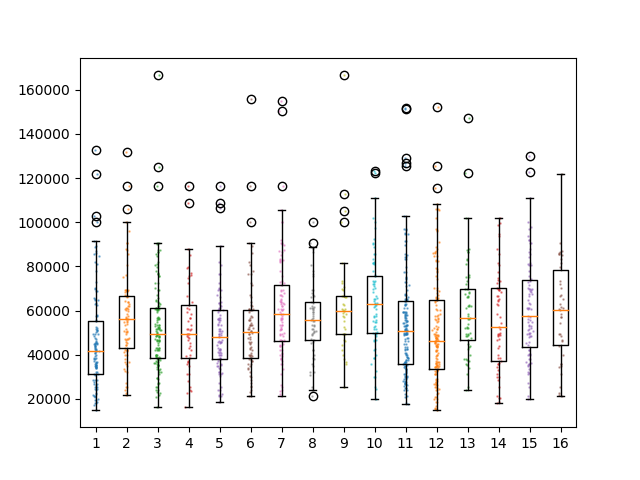

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [13]:
%matplotlib notebook


SE_size_all_cell_type = []


unique_cell_types = np.unique(combined_df['CELL_TYPE'])

unique_cell_types

peak_info_dict = {}

cell_type_list_to_examine = filtered_merged_df['merged_CELL_TYPE'].values

for _cell in unique_cell_types:
    
    SE_size_each_cell_type = []
    
    peak_info_dict[_cell]={}
    peak_info_dict[_cell]['chrom'] = []
    peak_info_dict[_cell]['size'] = []
 
    _peak_num = 0
    _specific_peak_num = 0
    
    for _peak_index, cell_types_to_examine in enumerate(cell_type_list_to_examine):
        
        if _cell in cell_types_to_examine:
            _peak_num+=1
            if len(cell_types_to_examine) ==1:
                _specific_peak_num +=1
                
                peak_info_dict[_cell]['chrom'].append(filtered_merged_df.iloc[_peak_index]['CHROM'])
                peak_info_dict[_cell]['size'].append(filtered_merged_df.iloc[_peak_index]['merged_SIZE'])
                
            SE_size_each_cell_type.append(filtered_merged_df.iloc[_peak_index]['merged_SIZE'])
                
    SE_size_all_cell_type.append(SE_size_each_cell_type)
                
                    
    median_size = np.median(peak_info_dict[_cell]['size'])
    
    print (f'-- There are {_peak_num} filtered peaks, including {_specific_peak_num} peaks that is specific for the {_cell};')
    print (f'-- The median size for specific peaks for the {_cell} is {median_size};')









boxplot_1= plt.boxplot(SE_size_all_cell_type, meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate(SE_size_all_cell_type):
    #names.append(name)
    vals.append(subdf)
    xs.append(np.random.normal(i+1, 0.04, len(subdf)))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 0.6, alpha=0.5)

In [313]:
filtered_merged_df
chrom_SE_num_list = []

for _chrom in np.unique(filtered_merged_df['CHROM']):
    
    chrom_df = filtered_merged_df[filtered_merged_df['CHROM']==_chrom]
    print(_chrom)
    chrom_SE_num_list.append(len(chrom_df))
chrom_SE_num_list    

chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chrX


[76, 65, 57, 36, 49, 57, 35, 38, 34, 33, 35, 75, 60, 63, 60, 57, 45, 53, 56, 7]

# Visualzie filtered peaks

In [305]:

filtered_df_to_plot = []

#chrom_index = 'chr3'

#chrom_list = [f'chr{i}' for i in range(11,20)]

chrom_list = [f'chr{i}' for i in range(1,11)]

for _chrom_index in chrom_list:
    
    
    
    _type_df_SE_chrom = filtered_merged_df[filtered_merged_df['CHROM'] == _chrom_index]
    _type_df_SE_chrom = _type_df_SE_chrom[_type_df_SE_chrom['merged_SIZE']>0]
    _type_df_SE_chrom_sort = _type_df_SE_chrom.sort_values(by=['merged_START']) 
    
    filtered_df_to_plot.append(_type_df_SE_chrom_sort)

    
chrom_list

len(filtered_df_to_plot)

10

In [296]:
filtered_df_to_plot[0].head()

,CHROM,merged_START,merged_STOP,merged_CELL_TYPE,merged_initial_index,score,ave_score,merged_SIZE
0,chr1,9610471,9646458,[L6_CT],[10392],[1.0],1.0,35987
0,chr1,9759317,9835402,[L2_3_IT],[2107],[1.0],1.0,76085
0,chr1,20898605,20943251,[Astro],[194],[1.0],1.0,44646
0,chr1,21485446,21554433,[L2_3_IT],[2210],[1.0],1.0,68987
0,chr1,21684557,21783163,[Sncg],[17985],[1.0],1.0,98606


In [306]:
coords_list = []

for filtered_type_df in filtered_df_to_plot:
    
    coords= []

    for row_df in filtered_type_df.iloc():
    
        coords.append(np.array([int(row_df['merged_START']/1000),int(row_df['merged_STOP']/1000)]))
    
    coords = np.array(coords)
    
    coords_list.append(coords)



In [307]:
#coords

len(coords_list)

10

<IPython.core.display.Javascript object>


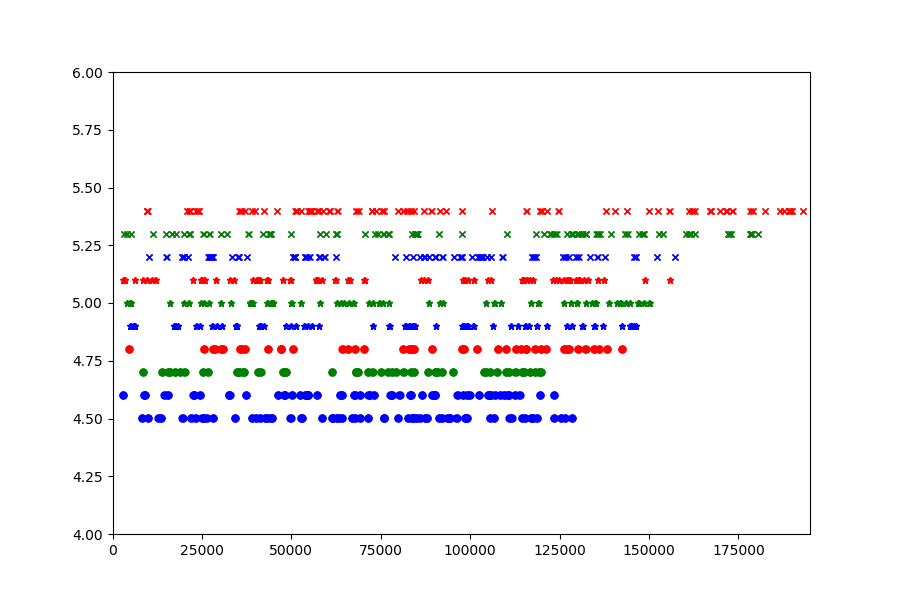

In [309]:
%matplotlib notebook

marker_shape_list = ['xr-', 'xg-', 'xb-', '*r-', '*g-', '*b-', 'or-','og-','ob-','ob-'] # l2-3,l4-5,sst,astro

count =5.5

fig, ax = plt.subplots(figsize=(9, 6))


for coords, marker_shape in zip(coords_list[:], marker_shape_list[:]):
    count-=0.1
    for index, coord in enumerate(coords):

        ax.plot(coord, np.zeros_like(coord) + count, marker_shape,markersize=5, alpha =1)

#plt.ylim (-10,10)
#plt.xlim([0, 20000000])
ax.set_ylim([0, 10])

ax.set_ylim([4, 6])
ax.set_xlim([0, 195000])

plt.show()